# Proyecto
### By
### Ortiz Garcia Miguel Angel 
### Solis Vilchis Roberto Atonatiuh

## Librerias y modulos

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
cf.go_offline()

In [2]:
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition  import PCA

import sklearn.cluster      as skcluster
from sklearn.cluster        import KMeans
from sklearn.metrics        import silhouette_score
from sklearn.cluster        import AgglomerativeClustering

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from imblearn.combine       import SMOTETomek

from sklearn.svm            import SVC
from sklearn.ensemble       import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model   import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [4]:
import joblib

from sklearn.metrics         import confusion_matrix, classification_report
from sklearn.metrics         import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import learning_curve

## Lectura de datos y EDA

### Lectura

In [3]:
spo = pd.read_csv('./spotify-2023.csv', encoding='ISO-8859-1')

In [6]:
spo.shape

(953, 24)

In [7]:
spo.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
spo.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_name,953,943,Daylight,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist(s)_name,953,645,Taylor Swift,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,953.0,NaN,NaN,NaN,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,NaN,NaN,NaN,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,NaN,NaN,NaN,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,NaN,NaN,NaN,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,NaN,NaN,NaN,5200.124869,7897.60899,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,NaN,NaN,NaN,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
streams,953,949,723894473,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,953.0,NaN,NaN,NaN,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0


In [9]:
spo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Ingieneria de columnas (transformacion de tipo de dato y definicion de variables continuas y discretas) y nulos

In [12]:
vi = spo[spo['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index[0]

In [13]:
spo.loc[vi, ['streams']] = np.nan

In [12]:
spo['streams'] = spo['streams'].astype('Int64')

In [13]:
spo['in_deezer_playlists'] = spo['in_deezer_playlists'].astype(str)

In [14]:
spo['in_deezer_playlists'] = spo['in_deezer_playlists'].apply(lambda x: int(x.replace(',', '')))

In [15]:
spo['in_deezer_playlists'] = spo['in_deezer_playlists'].astype(int)

In [16]:
spo['in_shazam_charts'] = spo['in_shazam_charts'].astype(str)

In [17]:
spo['in_shazam_charts'].replace('nan', np.nan, inplace=True)
spo['in_shazam_charts'] = spo['in_shazam_charts'].apply(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else np.nan )

In [18]:
spo['in_shazam_charts'] = spo['in_shazam_charts'].astype('Int64')

In [19]:
spo['date'] = pd.to_datetime(spo[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1))

In [20]:
spo.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True, axis=1)

In [21]:
spo['date'] = spo['date'].astype('str')

NULOS

In [22]:
nulos = spo.isnull().sum()
print(f'Columnas con al menos un nulo: \n{nulos[nulos > 0]}')

Columnas con al menos un nulo: 
streams              1
in_shazam_charts    50
key                 95
dtype: int64


In [23]:
imputar_moda_cat = SimpleImputer(strategy='most_frequent')

In [24]:
spo['key'] = imputar_moda_cat.fit_transform(spo[['key']]).ravel()

In [25]:
spo['key'] = spo['key'].astype(str)

In [26]:
imput_streams = SimpleImputer(strategy='mean')

In [27]:
spo['streams'] = imput_streams.fit_transform(spo[['streams']])

In [28]:
imput_shazam_charts = SimpleImputer(strategy='median')

In [29]:
spo['in_shazam_charts'] = imput_shazam_charts.fit_transform(spo[['in_shazam_charts']])

In [30]:
spo.to_parquet('spotify.parquet')

### Valores Atipicos (Capping y Flooring)

In [31]:
var_cont = list(spo.describe())

In [32]:
var_dis = [x for x in spo.columns if x not in var_cont + ['date']]

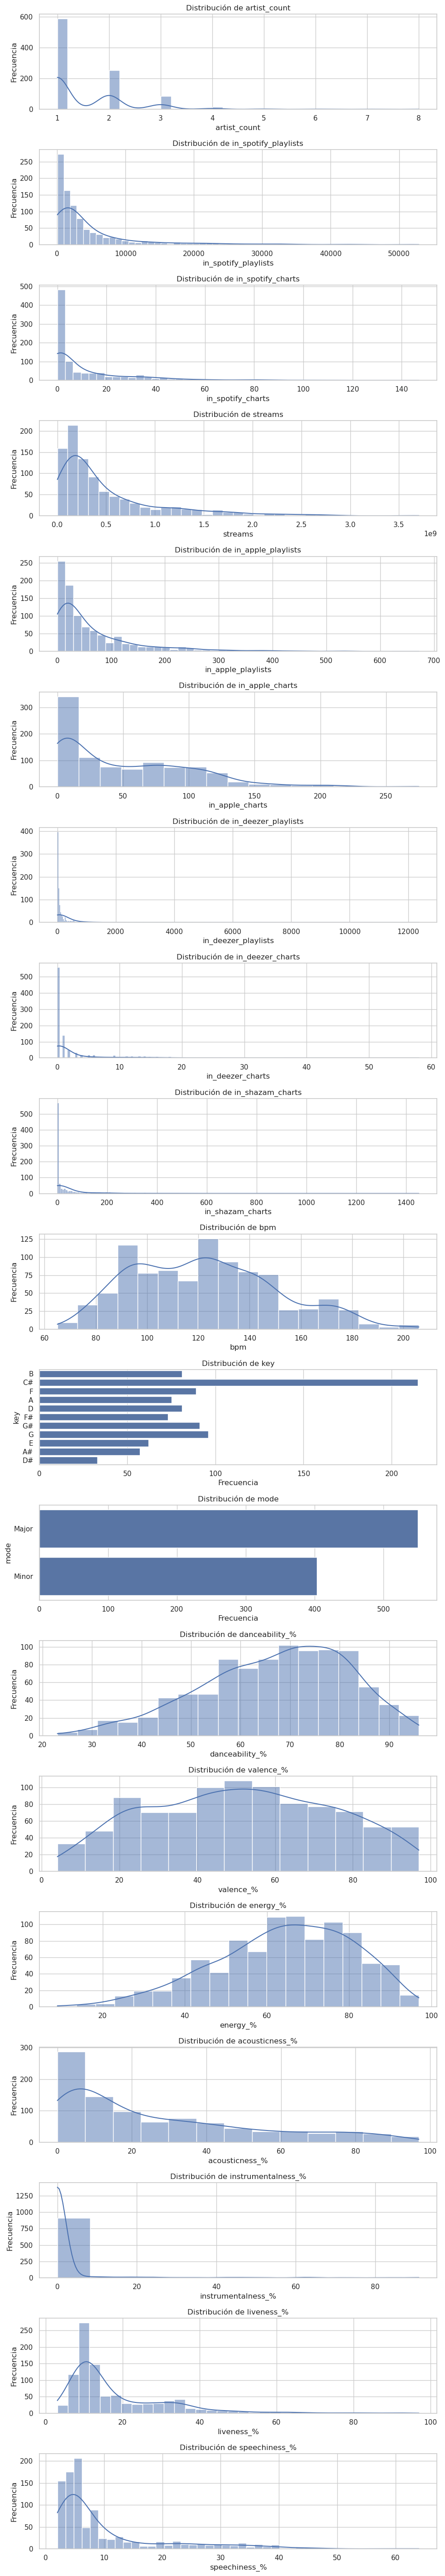

In [33]:
exclude_columns = ['track_name', 'artist(s)_name', 'date']

columns_to_plot = [col for col in spo.columns if col not in exclude_columns]

sns.set(style="whitegrid")

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 3 * num_columns))

for i, column in enumerate(columns_to_plot):
    ax = axes[i] if num_columns > 1 else axes
    if pd.api.types.is_numeric_dtype(spo[column]):
        sns.histplot(spo[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
    else:
        sns.countplot(y=spo[column], ax=ax)
        ax.set_xlabel('Frecuencia')
        ax.set_ylabel(column)
    ax.set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

In [34]:
change_column = ['in_deezer_charts', 'in_shazam_charts', 'in_deezer_playlists', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

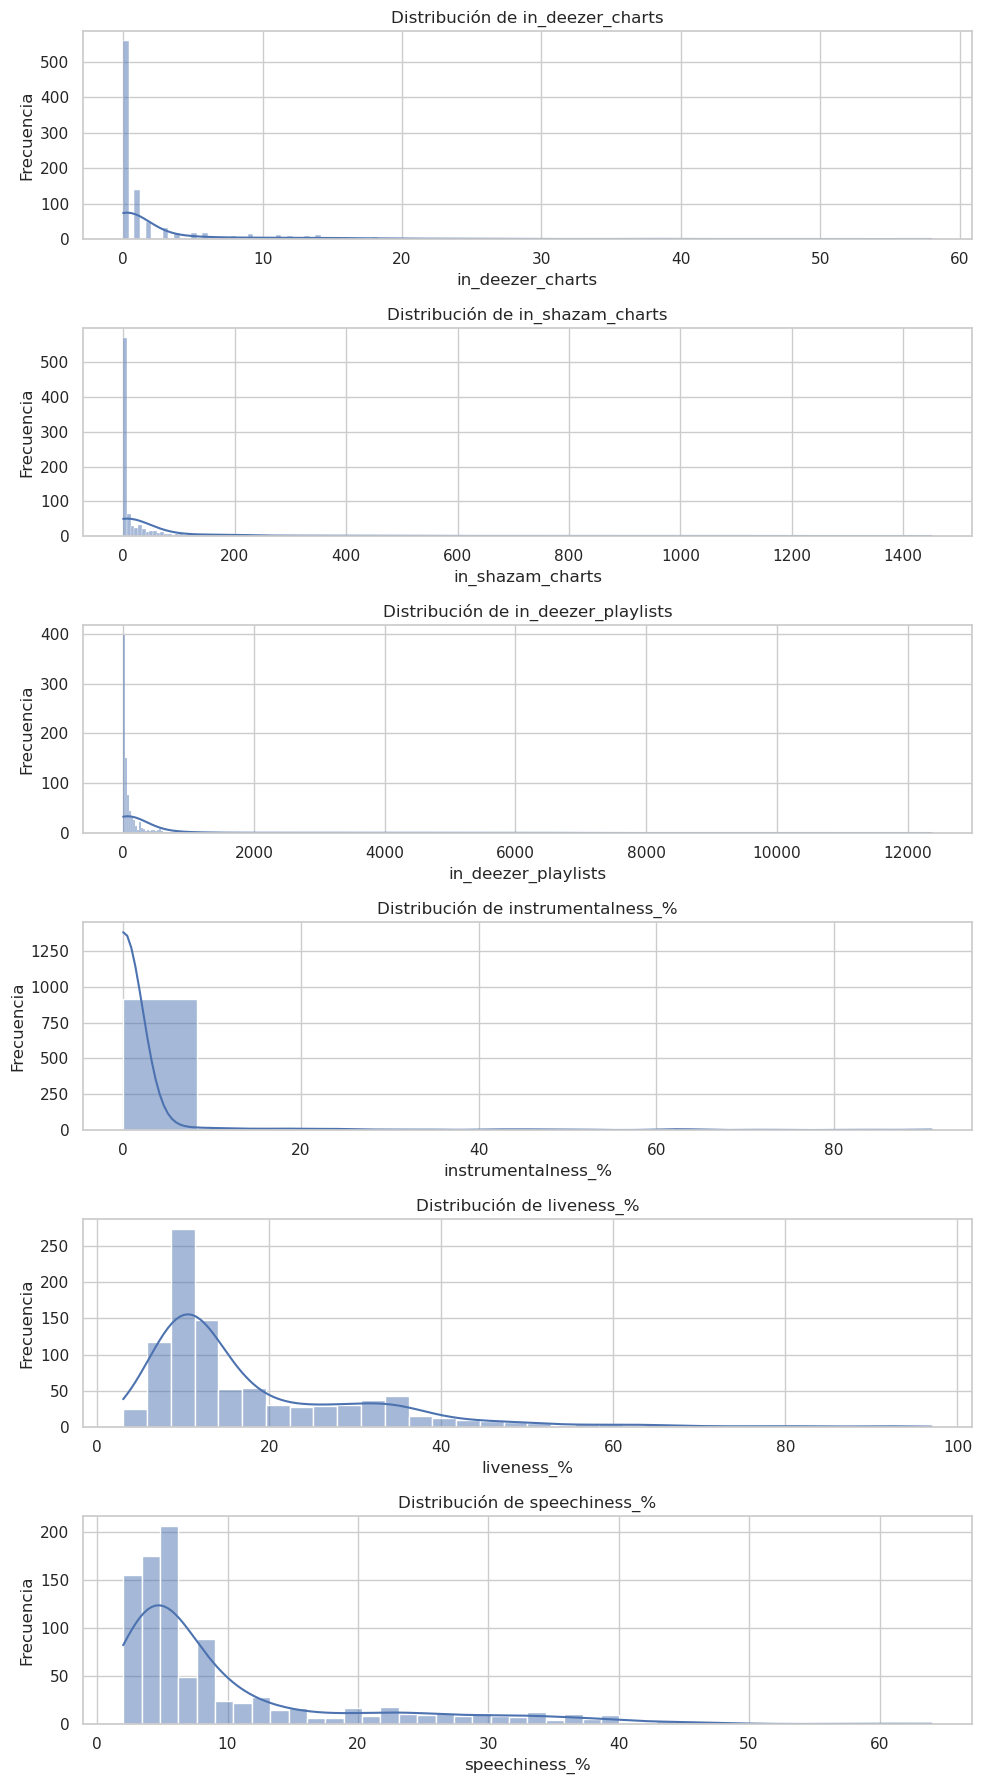

In [35]:
sns.set(style="whitegrid")

num_columns = len(change_column)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 3 * num_columns))

for i, column in enumerate(change_column):
    ax = axes[i] if num_columns > 1 else axes
    if pd.api.types.is_numeric_dtype(spo[column]):
        sns.histplot(spo[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
    else:
        sns.countplot(y=spo[column], ax=ax)
        ax.set_xlabel('Frecuencia')
        ax.set_ylabel(column)
    ax.set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

In [36]:
def cap_floor(df, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for column in change_column:
    spo = cap_floor(spo, column)

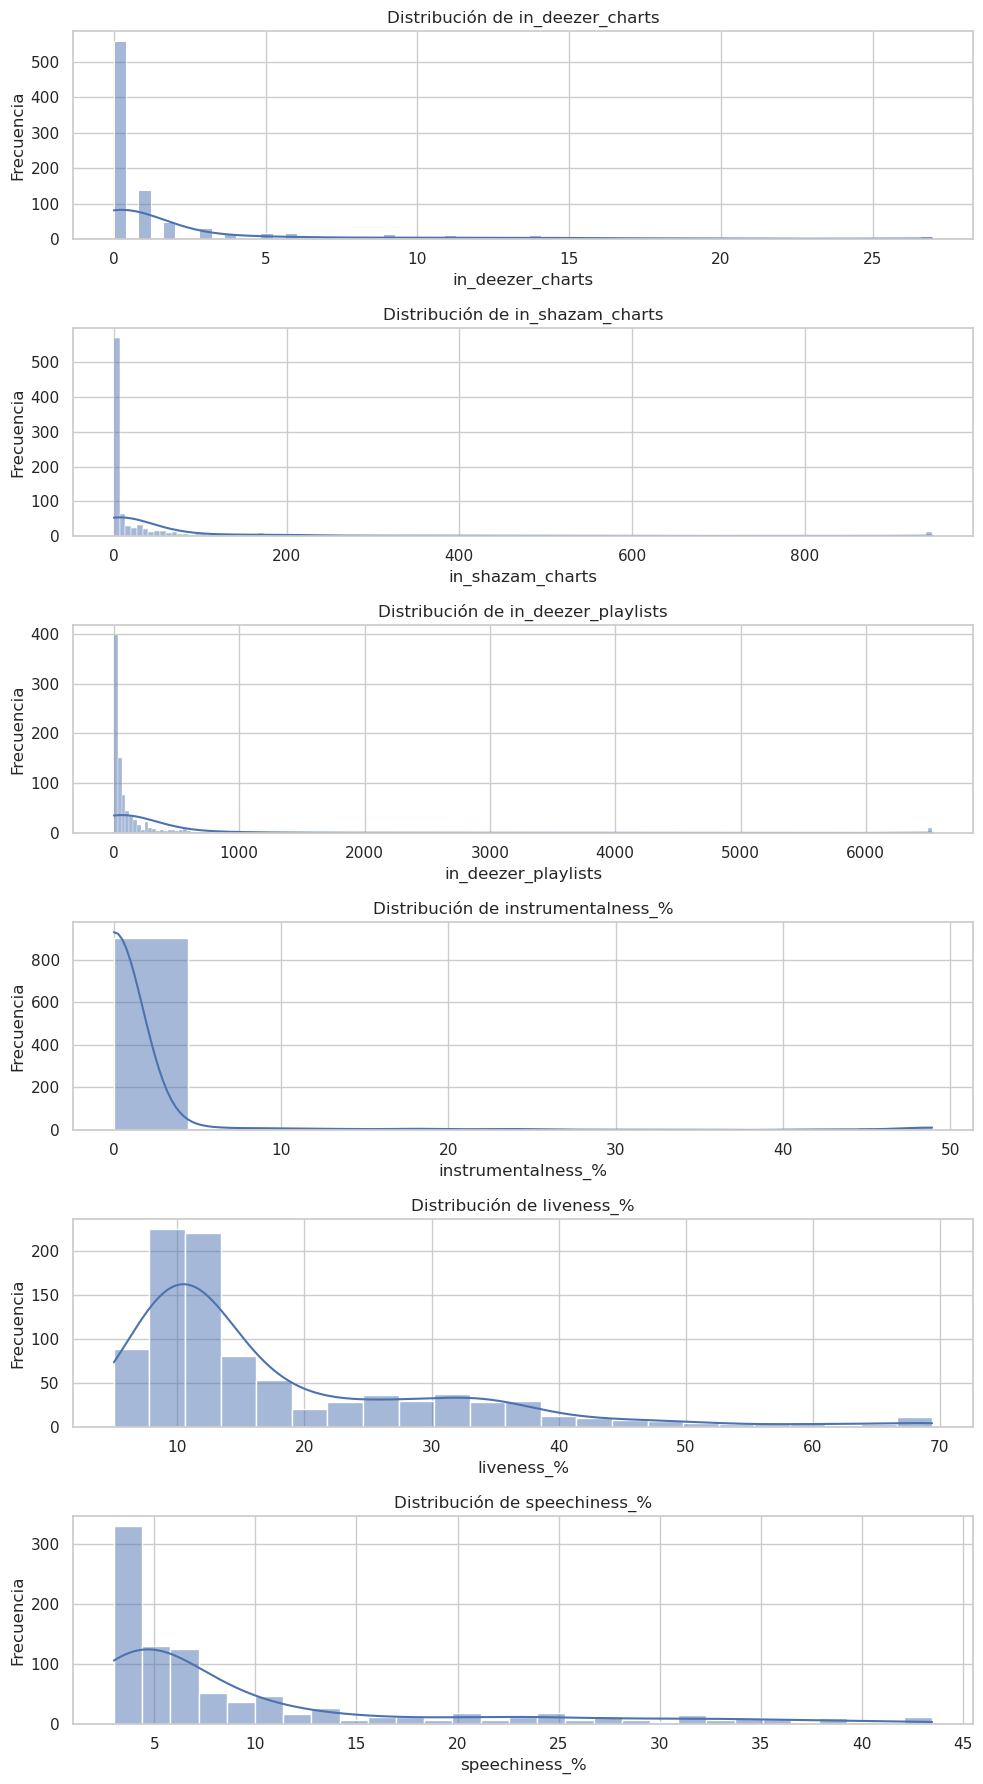

In [37]:
sns.set(style="whitegrid")

num_columns = len(change_column)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 3 * num_columns))

for i, column in enumerate(change_column):
    ax = axes[i] if num_columns > 1 else axes
    if pd.api.types.is_numeric_dtype(spo[column]):
        sns.histplot(spo[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
    else:
        sns.countplot(y=spo[column], ax=ax)
        ax.set_xlabel('Frecuencia')
        ax.set_ylabel(column)
    ax.set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

### Visualizaciones de variables

In [38]:
print(var_cont)

['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [39]:
charts = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
playlists = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
per = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

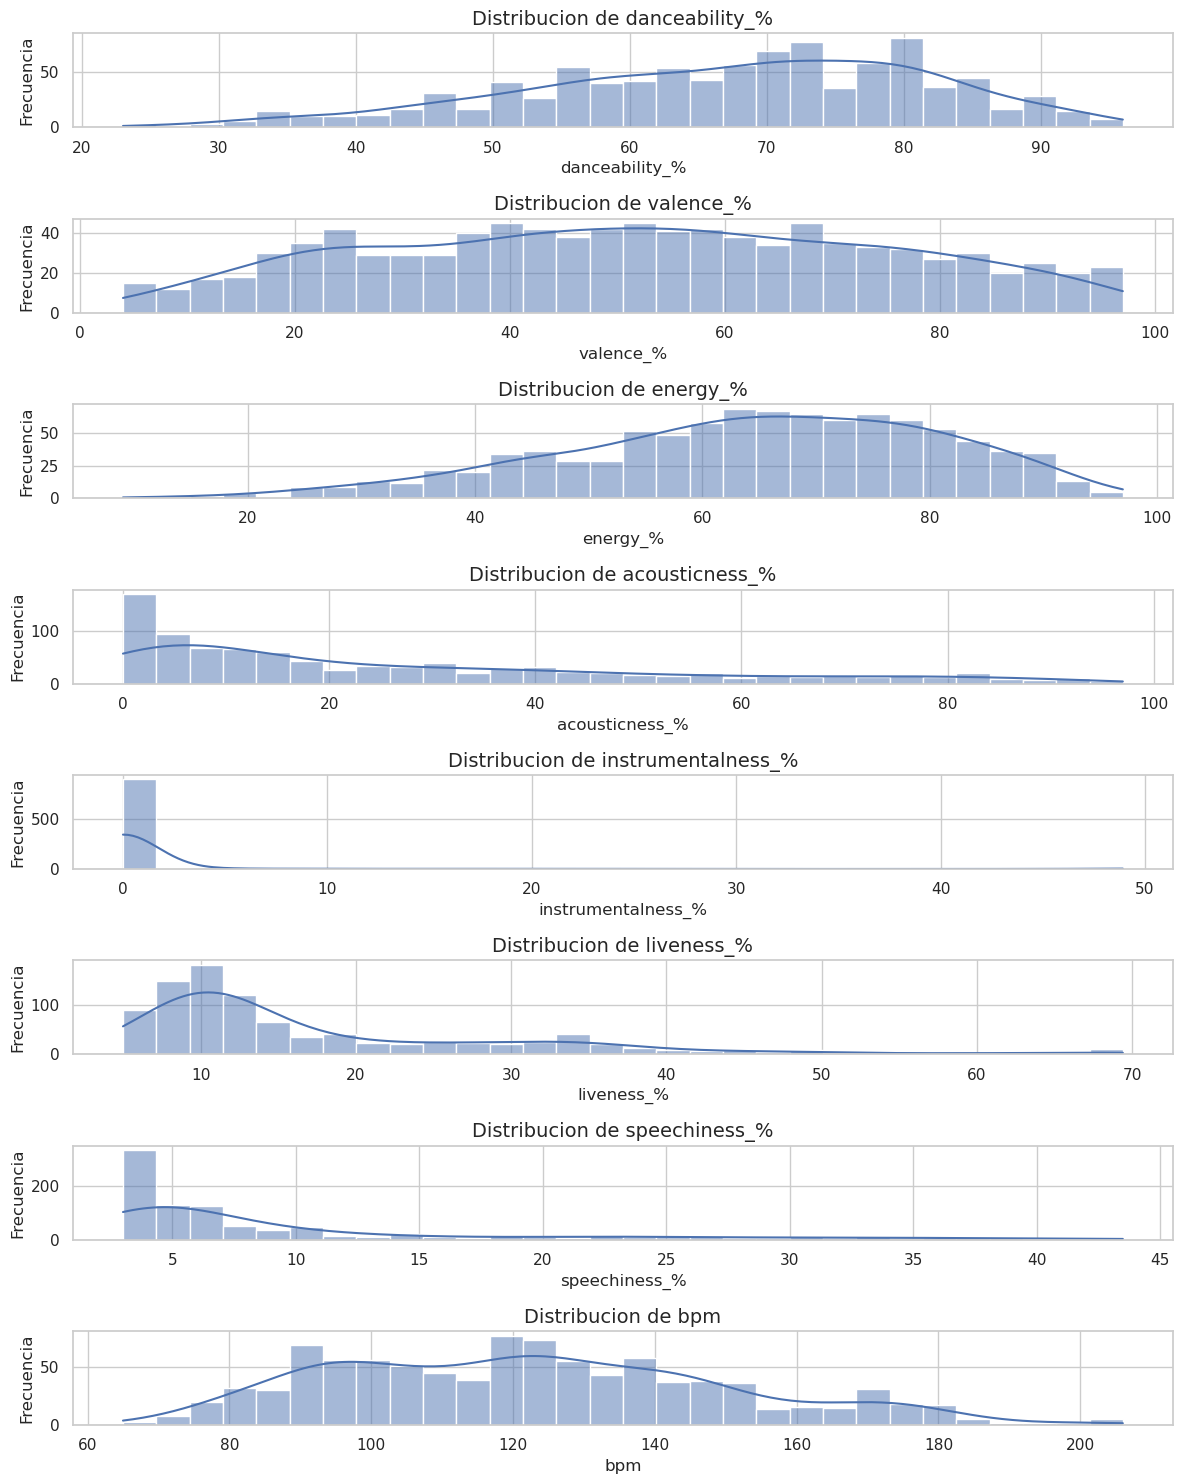

In [40]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=len(per), figsize=(12, 15))

for i, feature in enumerate(per):
    sns.histplot(spo[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribucion de {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

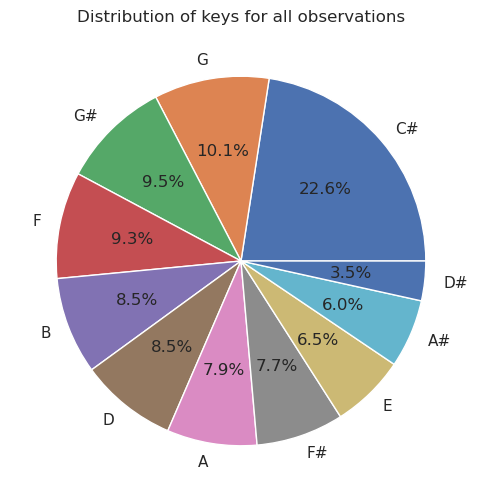

In [41]:
key_counts = spo['key'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(key_counts, labels = key_counts.index, autopct='%1.1f%%')
plt.title('Distribution of keys for all observations')
plt.show()

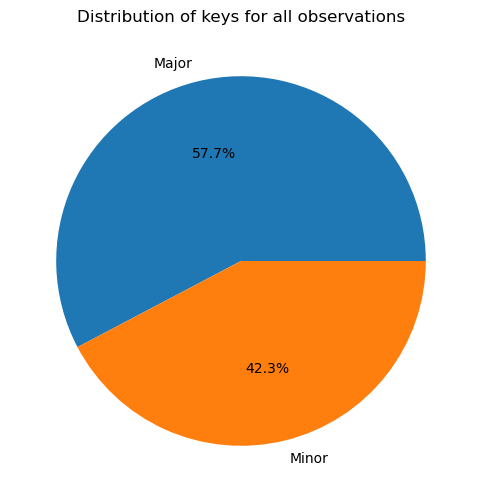

In [4]:
key_counts = spo['mode'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(key_counts, labels = key_counts.index, autopct='%1.1f%%')
plt.title('Distribution of keys for all observations')
plt.show()

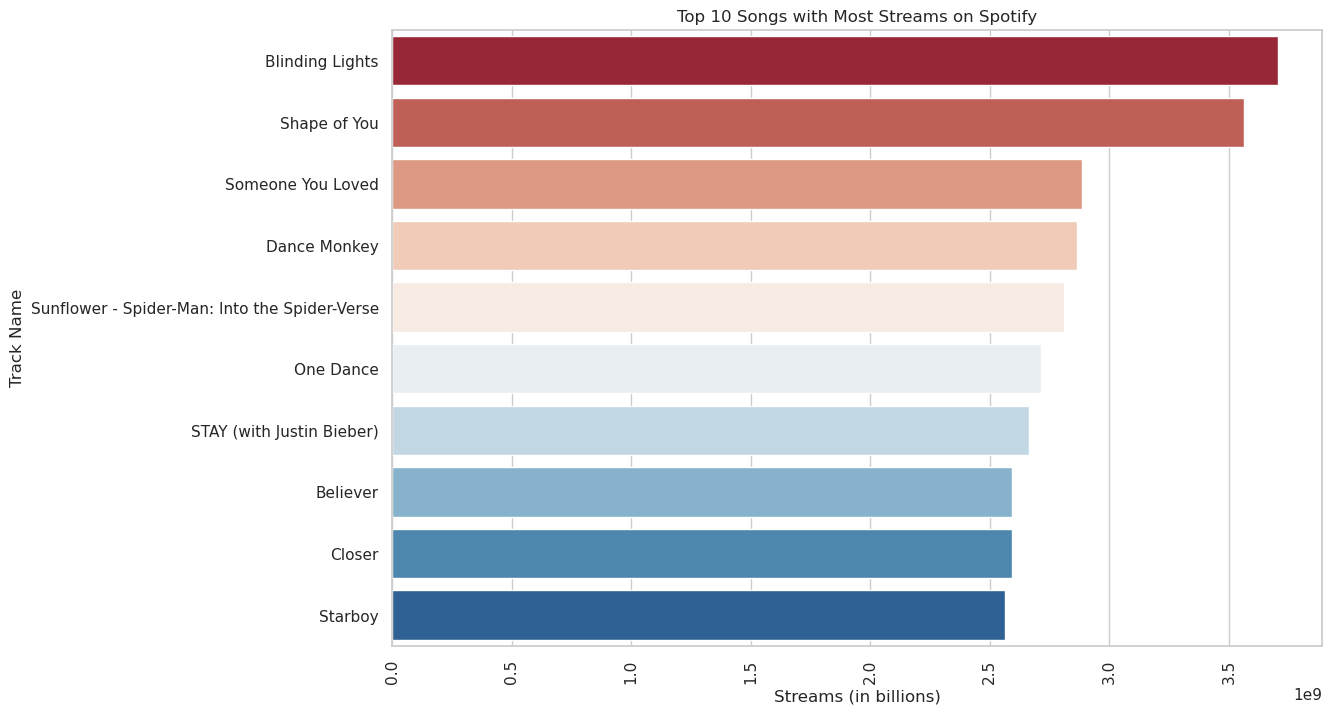

In [42]:
df = spo[['track_name', 'streams']].drop_duplicates(keep='first').sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=df['streams'], y=df['track_name'], palette='RdBu')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')
plt.xticks(rotation=90)
plt.show()

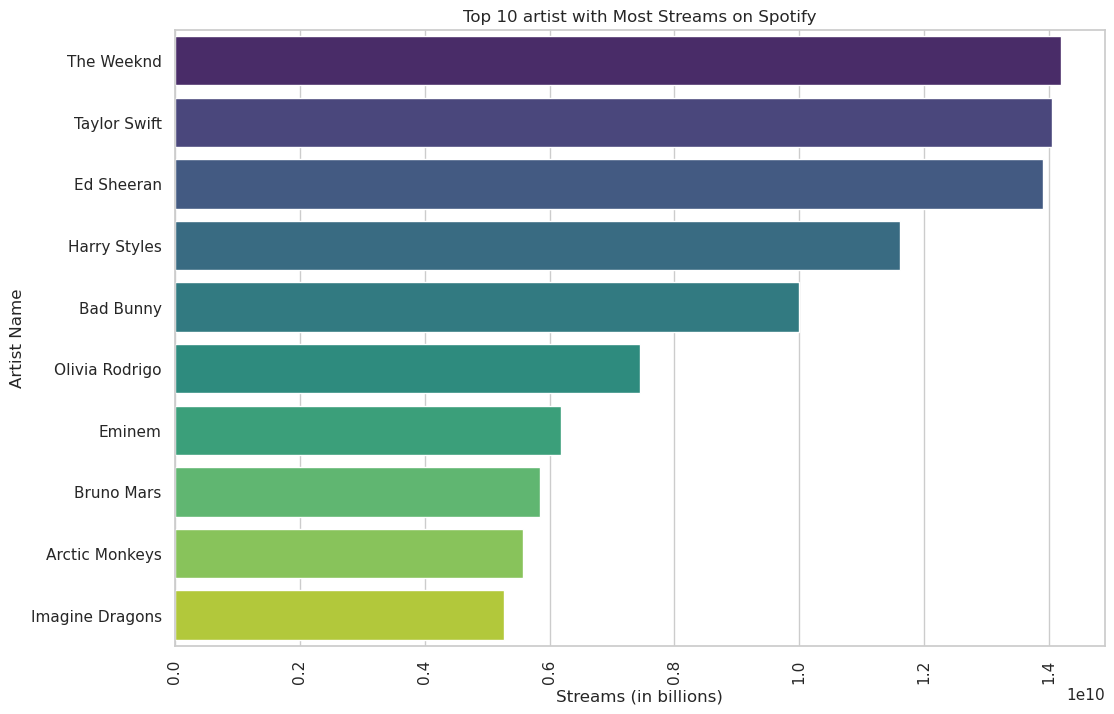

In [43]:
artista_streams = spo.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=artista_streams.values, y=artista_streams.index, palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Artist Name')
plt.title('Top 10 artist with Most Streams on Spotify')
plt.xticks(rotation=90)
plt.show()

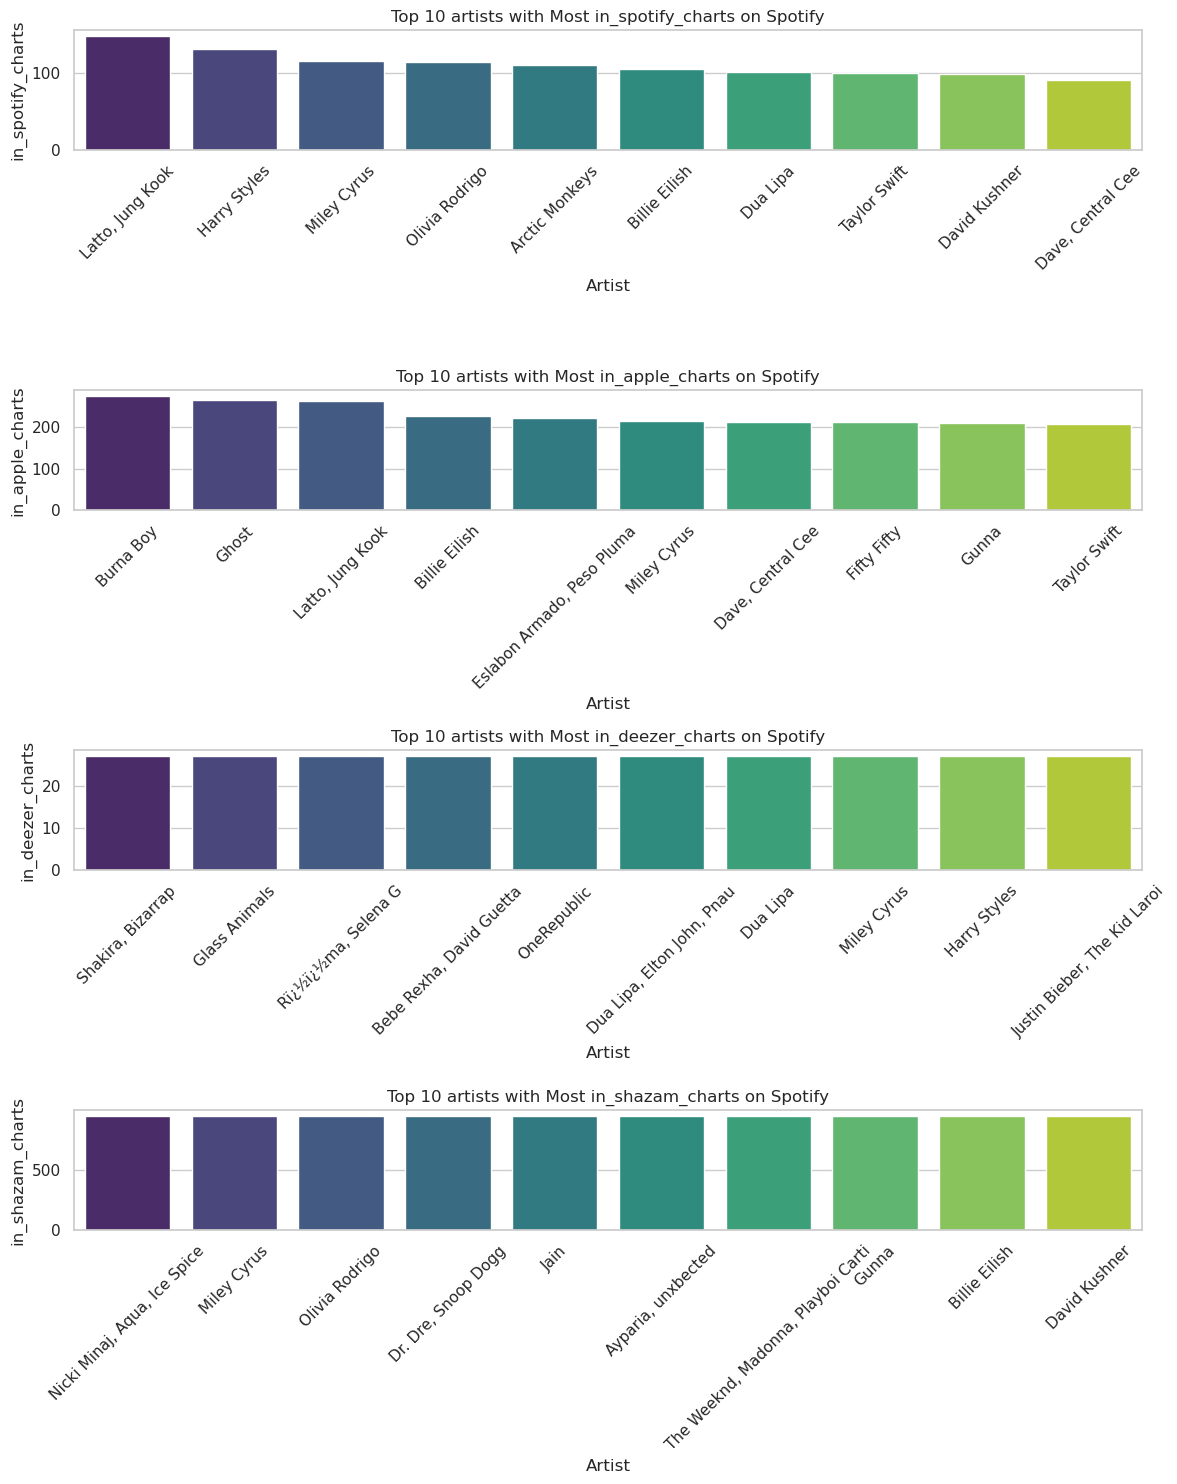

In [44]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=len(charts), figsize=(12, 15))

for i, feature in enumerate(charts):
    artista_charts = spo[['artist(s)_name', feature]].drop_duplicates(keep='first').sort_values(by=feature, ascending=False).head(10)
    sns.barplot(x='artist(s)_name', y=feature, data=artista_charts, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Top 10 artists with Most {feature} on Spotify')
    axes[i].set_xlabel('Artist')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

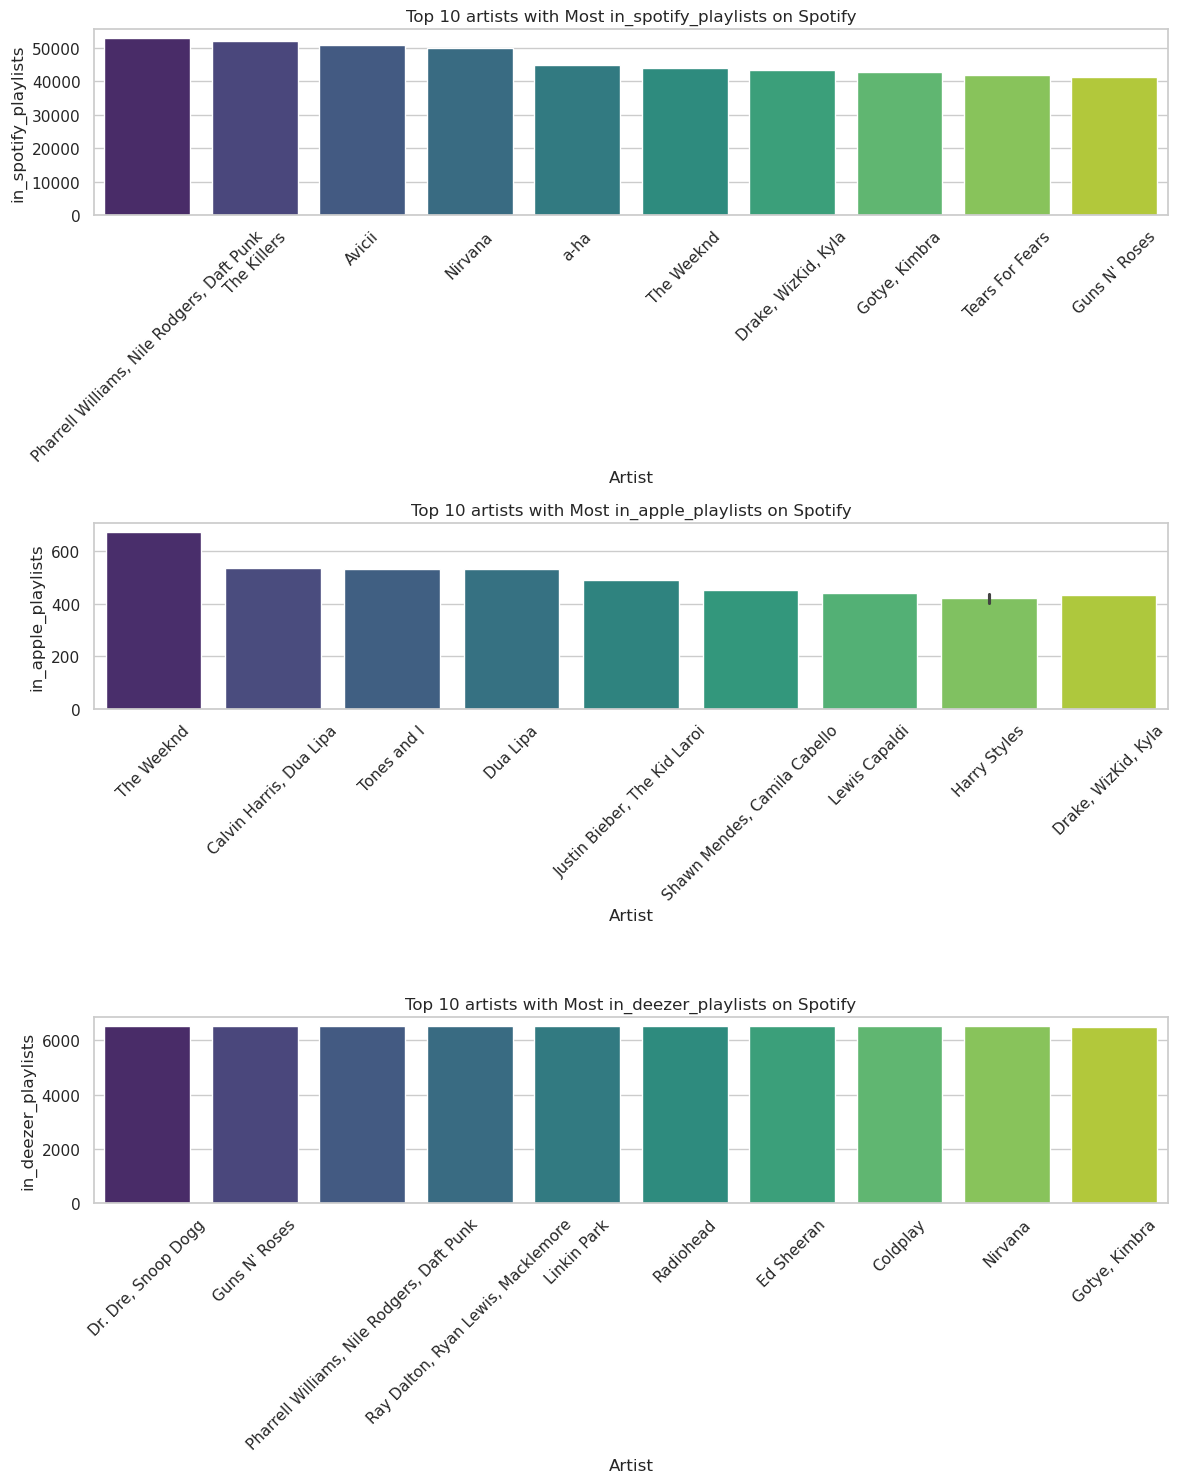

In [45]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=len(playlists), figsize=(12, 15))

for i, feature in enumerate(playlists):
    artista_charts = spo[['artist(s)_name', feature]].drop_duplicates(keep='first').sort_values(by=feature, ascending=False).head(10)
    sns.barplot(x='artist(s)_name', y=feature, data=artista_charts, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Top 10 artists with Most {feature} on Spotify')
    axes[i].set_xlabel('Artist')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

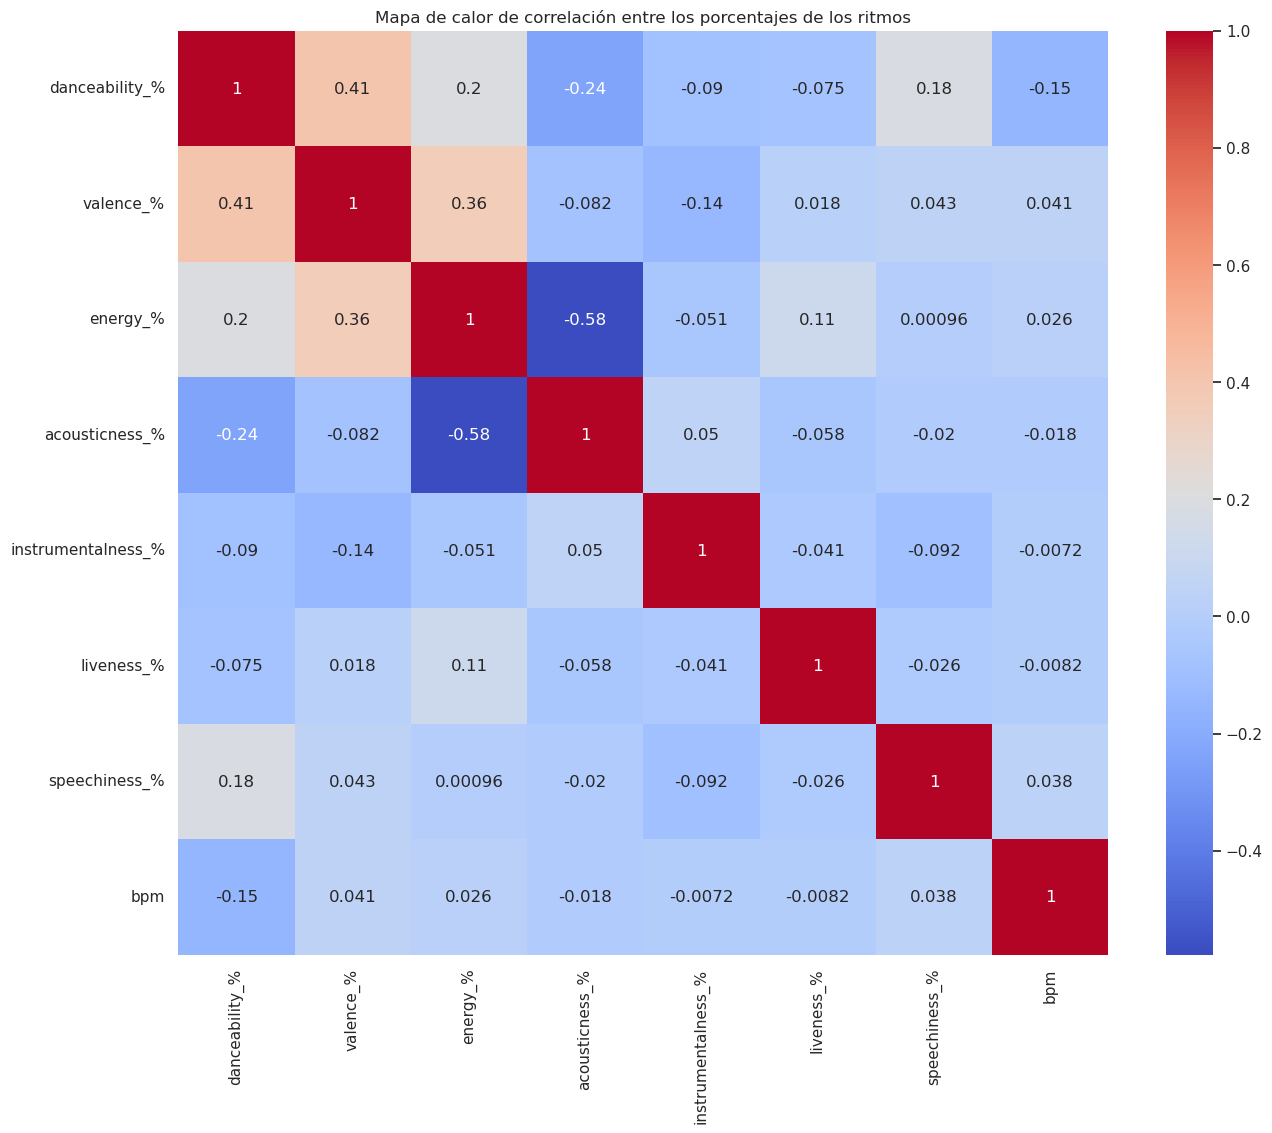

In [46]:
plt.figure(figsize=(15, 12))
sns.heatmap(spo[per].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre los porcentajes de los ritmos')
plt.show()

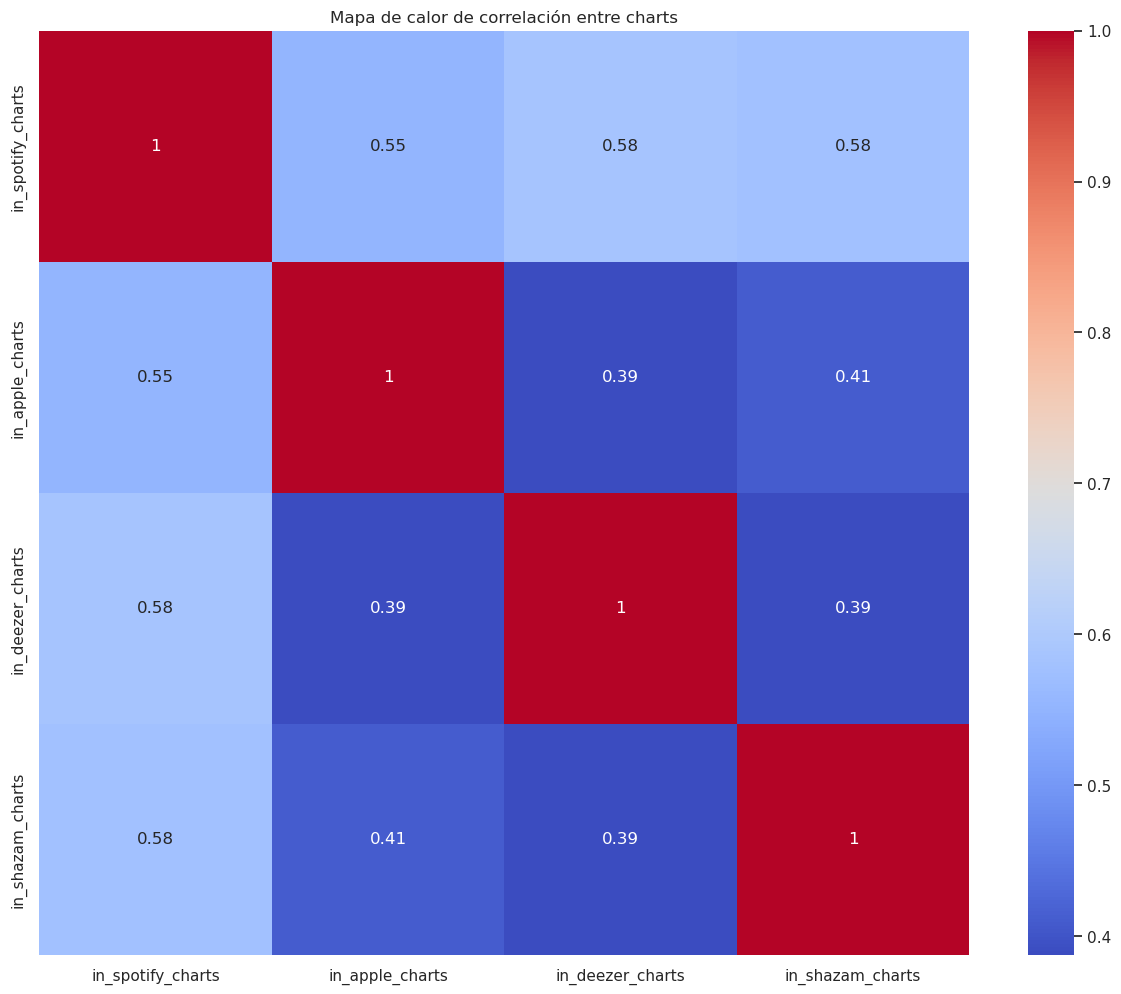

In [47]:
plt.figure(figsize=(15, 12))
sns.heatmap(spo[charts].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre charts')
plt.show()

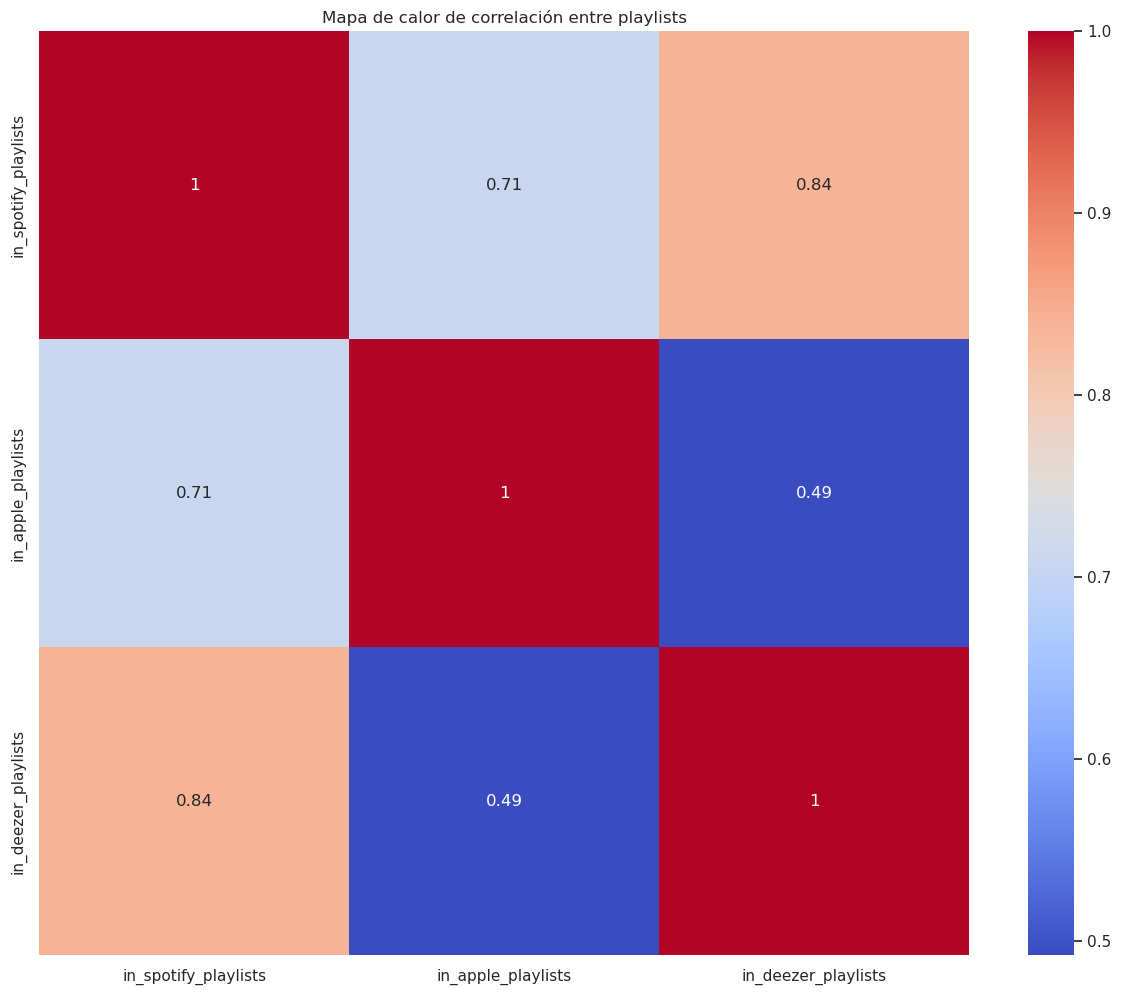

In [48]:
plt.figure(figsize=(15, 12))
sns.heatmap(spo[playlists].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre playlists')
plt.show()

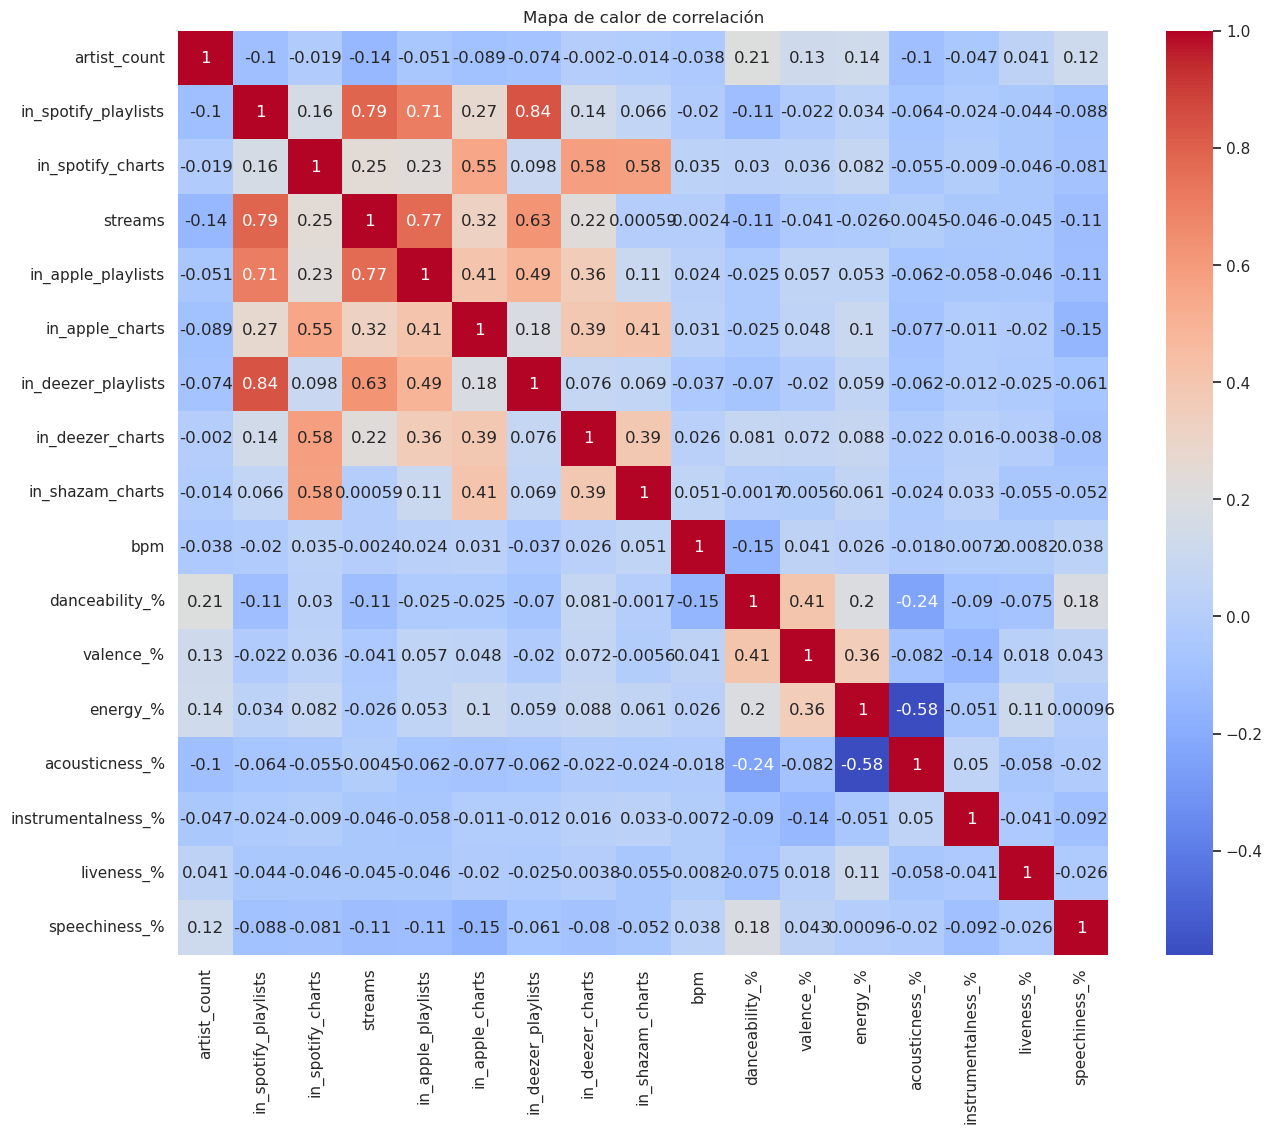

In [49]:
plt.figure(figsize=(15, 12))
sns.heatmap(spo[var_cont].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

## Modelacion

### Clusters

In [3]:
spo = pd.read_parquet('spotify.parquet')

In [51]:
rank = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 
        'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams']

per = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
        'liveness_%', 'speechiness_%', 'bpm']

In [52]:
X1 = spo[rank]

# Normalizar datos
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Aplicar PCA
pca = PCA(n_components=3)
X1_pca = pca.fit_transform(X1_scaled)

principal_components = pd.DataFrame(X1_pca, 
                        columns=['componente_1', 'componente_2', 'componente_3'])

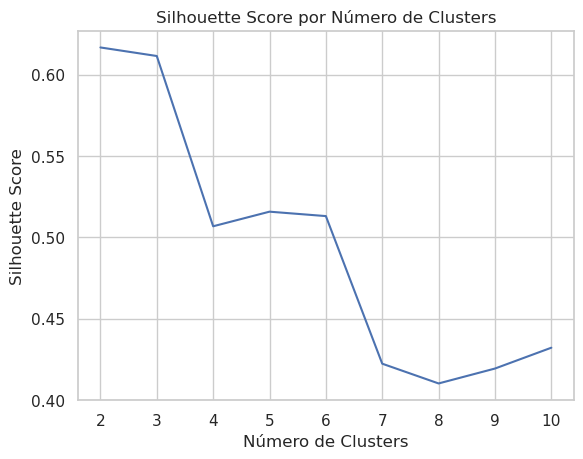

In [53]:
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=4, n_init=10, max_iter=1000)
    kmeans.fit(principal_components[['componente_1', 'componente_2', 'componente_3']])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(principal_components[['componente_1', 'componente_2', 'componente_3']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por Número de Clusters')
plt.show()

In [54]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(principal_components[['componente_1', 'componente_2', 'componente_3']])

silhouette_avg = silhouette_score(principal_components[['componente_1', 'componente_2', 'componente_3']], agg_labels)
print(f'Silhouette Score (Agglomerative Clustering): {silhouette_avg}')

Silhouette Score (Agglomerative Clustering): 0.6048764482525948


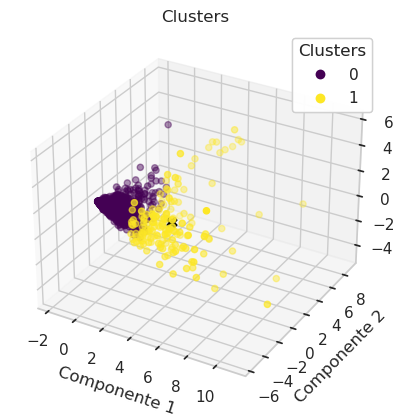

In [55]:
kmeans = skcluster.KMeans(n_clusters=2, random_state=4, n_init=10, max_iter=1000)
kmeans.fit(principal_components)

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

principal_components['cluster'] = clusters

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(principal_components['componente_1'], 
                    principal_components['componente_2'], 
                    principal_components['componente_3'], 
                    c=clusters, cmap='viridis')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
            s=50, color='black', marker='X', label='Centroids')

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Clusters')

# Añadir una leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [56]:
silhouette_avg = silhouette_score(principal_components[['componente_1', 'componente_2', 'componente_3']], clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.616627508161338


In [57]:
spo['clusters'] = clusters

### Modelos

#### Preparacion

In [58]:
spo[per].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   danceability_%      953 non-null    int64
 1   valence_%           953 non-null    int64
 2   energy_%            953 non-null    int64
 3   acousticness_%      953 non-null    int64
 4   instrumentalness_%  953 non-null    int64
 5   liveness_%          953 non-null    int64
 6   speechiness_%       953 non-null    int64
 7   bpm                 953 non-null    int64
dtypes: int64(8)
memory usage: 59.7 KB


In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(spo[per])
y = spo['clusters']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
def entrenar(param, modelo, X,y):
    grid = RandomizedSearchCV(param_distributions=param,
                            n_jobs=-1,
                            n_iter=10,
                            cv=4,
                            estimator=modelo,
                            error_score='raise')
    grid.fit(X,y)
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_

In [61]:
def entrenar_g(param, modelo, X,y):
    grid = GridSearchCV(param_grid=param,
                        n_jobs=-1,
                        cv=4,
                        estimator=modelo,
                        error_score='raise')
    grid.fit(X,y)
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_

In [62]:
# SVM (Máquinas de vectores de soporte)
svm_param = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}
# Random Forest
rf_param = dict(n_estimators=list(range(1, 100, 25)),
                                    criterion=['gini', 'entropy'],
                                    max_depth=[x for x in list(range(2, 5))] + [None],
                                    min_samples_split=[x for x in list(range(2, 4))],
                                    min_samples_leaf=[x for x in list(range(2, 4))],
                                    max_features=[None] + [i * .05 for i in list(range(2, 4))],
                                    max_leaf_nodes=list(range(2, 10)) + [None],
                                    min_impurity_decrease=[x * .10 for x in list(range(2, 4))],
                                    oob_score=[True,False],
                                    warm_start=[True, False],
                                    class_weight=[None, 'balanced'],
                                    max_samples=[None],)
# Regresión Logística
rl_param = {'C': [0.1, 1, 10, 100]}
# Red Neuronal
rn_param = dict(activation = ['identity', 'logistic', 'tanh', 'relu'],
            solver = ['lbfgs', 'sgd', 'adam'],
            alpha = np.arange(0.0001, 0.001, 0.0001),
            learning_rate = ['constant', 'invscaling', 'adaptive'])
# Ada Boost
ab_param = dict(n_estimators = range(2,10),
            learning_rate = np.arange(0.1,1,0.1),
            algorithm = ['SAMME.R'])
# Analisis Descriminante
ad_param = dict(solver = ['svd', 'lsqr', 'eigen'])

#### Balance de clases

In [63]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

#### SVM (Máquinas de vectores de soporte)

In [64]:
modelo_svc = SVC(probability=True)
modelo_svc, best_estimator_svc, score_svc, params_svc = entrenar(svm_param, modelo_svc, X_train_res, y_train_res)

In [65]:
modelo_svc

RandomizedSearchCV(cv=4, error_score='raise', estimator=SVC(probability=True),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']})

In [66]:
best_estimator_svc

SVC(C=0.1, gamma=0.1, probability=True)

In [67]:
score_svc

0.5771375464684014

In [68]:
params_svc

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}

#### Random Forest

In [69]:
modelo_rf = RandomForestClassifier()
modelo_rf, best_estimator_rf, score_rf, params_rf = entrenar(rf_param, modelo_rf, X_train_res, y_train_res)

/home/roberto/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/home/roberto/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resul

In [70]:
modelo_rf

RandomizedSearchCV(cv=4, error_score='raise',
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, None],
                                        'max_features': [None, 0.1,
                                                         0.15000000000000002],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.2,
                                                                  0.30000000000000004],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [1, 26, 51, 76],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]})

In [71]:
best_estimator_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.2, min_samples_leaf=3,
                       n_estimators=1, oob_score=True, warm_start=True)

In [72]:
score_rf

0.5018587360594795

In [73]:
params_rf

{'warm_start': True,
 'oob_score': True,
 'n_estimators': 1,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'min_impurity_decrease': 0.2,
 'max_samples': None,
 'max_leaf_nodes': 5,
 'max_features': None,
 'max_depth': 2,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

#### Regresión Logística

In [74]:
modelo_rl = LogisticRegression()
modelo_rl, best_estimator_rl, score_rl, params_rl = entrenar_g(rl_param, modelo_rl, X_train_res, y_train_res)

In [75]:
modelo_rl

GridSearchCV(cv=4, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100]})

In [76]:
best_estimator_rl

LogisticRegression(C=1)

In [77]:
score_rl

0.5585501858736059

In [78]:
params_rl

{'C': 1}

#### Red Neuronal

In [79]:
modelo_rn = MLPClassifier()
modelo_rn, best_estimator_rn, score_rn, params_rn = entrenar(rn_param, modelo_rn, X_train_res, y_train_res)

/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):


In [80]:
modelo_rn

RandomizedSearchCV(cv=4, error_score='raise', estimator=MLPClassifier(),
                   n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']})

In [81]:
best_estimator_rn

MLPClassifier(alpha=0.0006000000000000001, solver='lbfgs')

In [82]:
score_rn

0.8596654275092936

In [83]:
params_rn

{'solver': 'lbfgs',
 'learning_rate': 'constant',
 'alpha': 0.0006000000000000001,
 'activation': 'relu'}

#### Ada Boost

In [84]:
modelo_ab = AdaBoostClassifier()
modelo_ab, best_estimator_ab, score_ab, params_ab = entrenar(ab_param, modelo_ab, X_train_res, y_train_res)

In [85]:
modelo_ab

RandomizedSearchCV(cv=4, error_score='raise', estimator=AdaBoostClassifier(),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R'],
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': range(2, 10)})

In [86]:
best_estimator_ab

AdaBoostClassifier(learning_rate=0.6, n_estimators=6)

In [87]:
score_ab

0.6078066914498141

In [88]:
params_ab

{'n_estimators': 6, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}

#### Analisis Descriminante

In [89]:
modelo_ad = LinearDiscriminantAnalysis()
modelo_ad, best_estimator_ad, score_ad, params_ad = entrenar_g(ad_param, modelo_ad, X_train_res, y_train_res)

In [90]:
modelo_ad

GridSearchCV(cv=4, error_score='raise', estimator=LinearDiscriminantAnalysis(),
             n_jobs=-1, param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [91]:
best_estimator_ad

LinearDiscriminantAnalysis()

In [92]:
score_ad

0.5548327137546468

In [93]:
params_ad

{'solver': 'svd'}

## Guardar Modelo

In [94]:
joblib.dump(modelo_svc, 'modelo_svc.pkl')

joblib.dump(modelo_rf, 'modelo_rf.pkl')

joblib.dump(modelo_rl, 'modelo_rl.pkl')

joblib.dump(modelo_rn, 'modelo_rn.pkl')

joblib.dump(modelo_ab, 'modelo_ab.pkl')

joblib.dump(modelo_ad, 'modelo_ad.pkl')

['modelo_ad.pkl']

## Cargar Modelo

In [95]:
modelo_svc = joblib.load('modelo_svc.pkl')

modelo_rf = joblib.load('modelo_rf.pkl')

modelo_rl = joblib.load('modelo_rl.pkl')

modelo_rn = joblib.load('modelo_rn.pkl')

modelo_ab = joblib.load('modelo_ab.pkl')

modelo_ad = joblib.load('modelo_ad.pkl')

## Evaluacion del modelo

### Preparacion

In [96]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [97]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

In [98]:
def print_classification_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

### Modelos

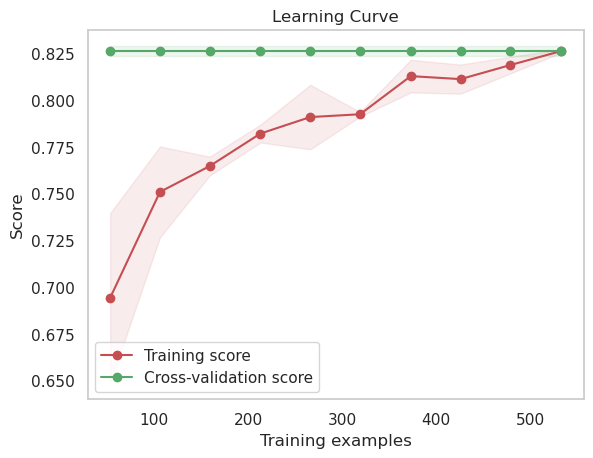

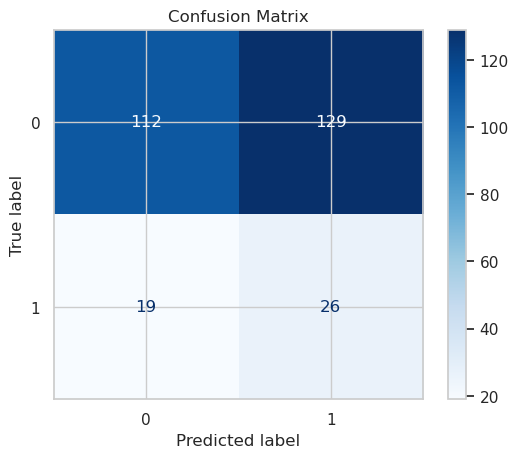

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.46      0.60       241
           1       0.17      0.58      0.26        45

    accuracy                           0.48       286
   macro avg       0.51      0.52      0.43       286
weighted avg       0.75      0.48      0.55       286



In [99]:
plot_learning_curve(modelo_svc, X_train, y_train)
plot_confusion_matrix(modelo_svc, X_test, y_test)
print_classification_report(modelo_svc, X_test, y_test)

/home/roberto/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/home/roberto/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resul

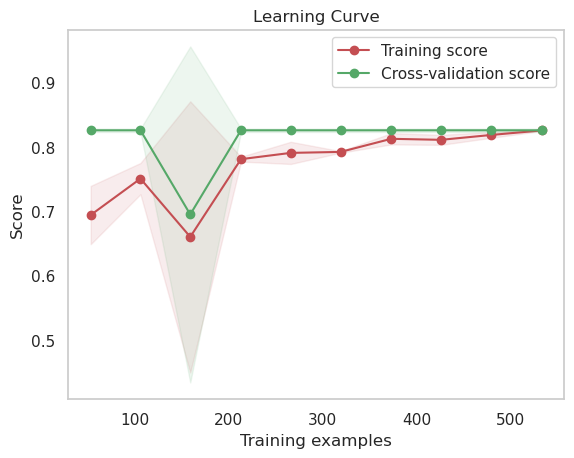

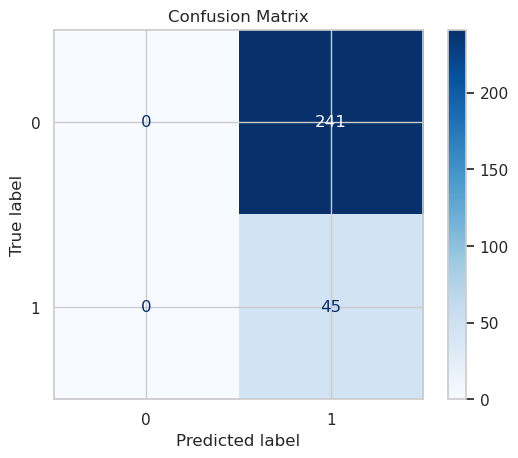

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       241
           1       0.16      1.00      0.27        45

    accuracy                           0.16       286
   macro avg       0.08      0.50      0.14       286
weighted avg       0.02      0.16      0.04       286



/home/roberto/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/roberto/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/roberto/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [100]:
plot_learning_curve(modelo_rf, X_train, y_train)
plot_confusion_matrix(modelo_rf, X_test, y_test)
print_classification_report(modelo_rf, X_test, y_test)

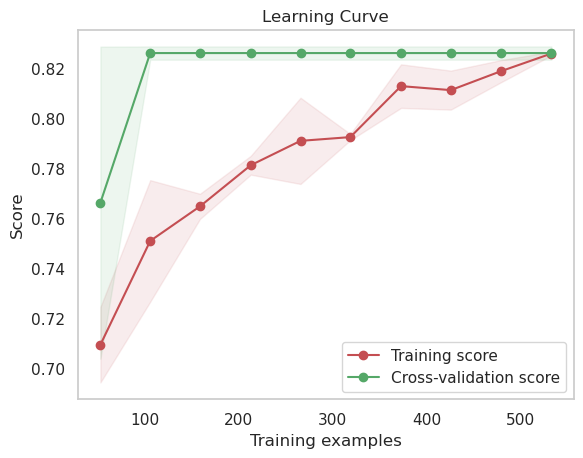

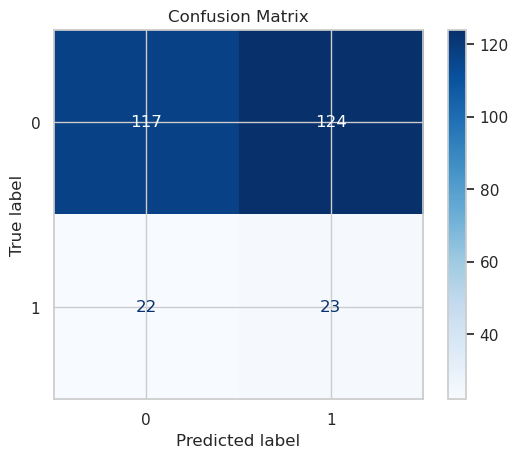

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.49      0.62       241
           1       0.16      0.51      0.24        45

    accuracy                           0.49       286
   macro avg       0.50      0.50      0.43       286
weighted avg       0.73      0.49      0.56       286



In [101]:
plot_learning_curve(modelo_rl, X_train, y_train)
plot_confusion_matrix(modelo_rl, X_test, y_test)
print_classification_report(modelo_rl, X_test, y_test)

/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/roberto/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/roberto/.local/lib/python3.11/site-pac

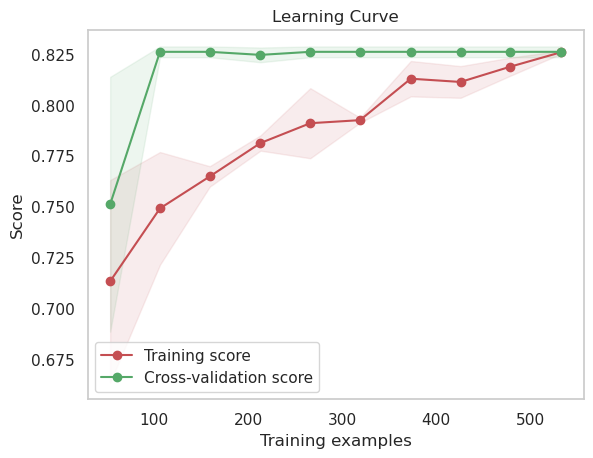

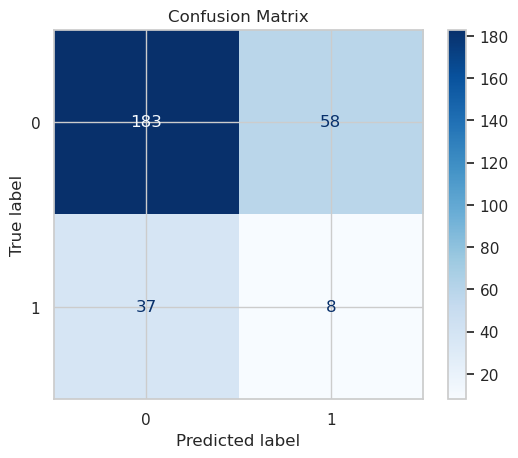

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       241
           1       0.12      0.18      0.14        45

    accuracy                           0.67       286
   macro avg       0.48      0.47      0.47       286
weighted avg       0.72      0.67      0.69       286



In [102]:
plot_learning_curve(modelo_rn, X_train, y_train)
plot_confusion_matrix(modelo_rn, X_test, y_test)
print_classification_report(modelo_rn, X_test, y_test)

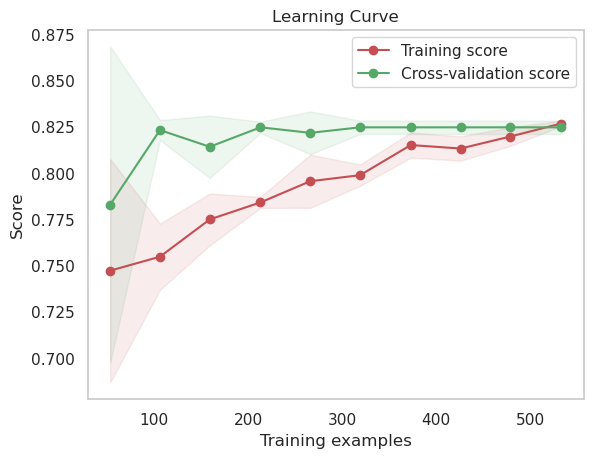

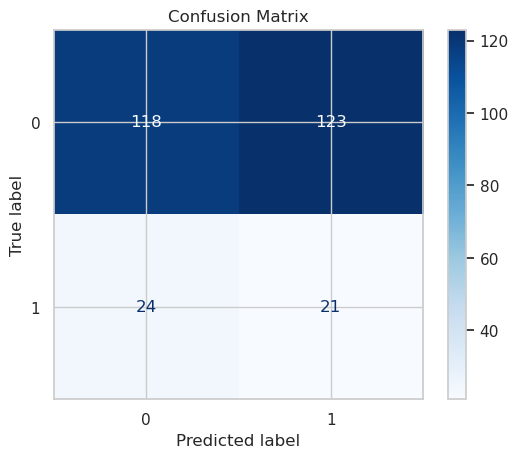

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.62       241
           1       0.15      0.47      0.22        45

    accuracy                           0.49       286
   macro avg       0.49      0.48      0.42       286
weighted avg       0.72      0.49      0.55       286



In [103]:
plot_learning_curve(modelo_ab, X_train, y_train)
plot_confusion_matrix(modelo_ab, X_test, y_test)
print_classification_report(modelo_ab, X_test, y_test)

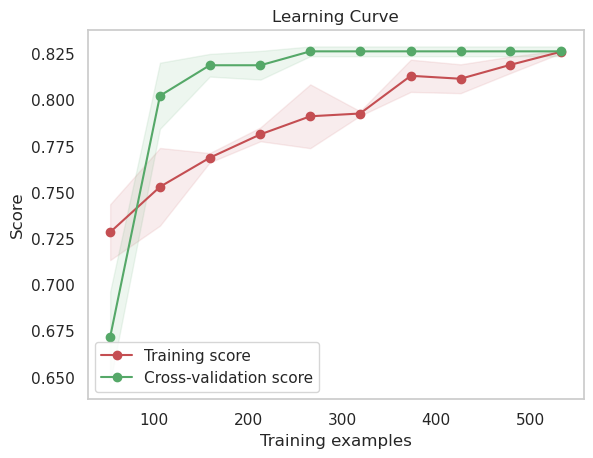

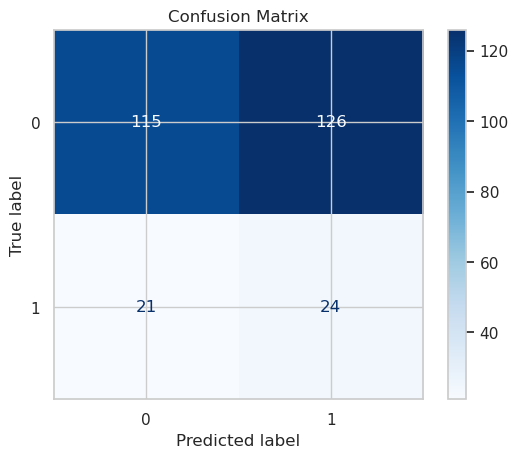

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.48      0.61       241
           1       0.16      0.53      0.25        45

    accuracy                           0.49       286
   macro avg       0.50      0.51      0.43       286
weighted avg       0.74      0.49      0.55       286



In [104]:
plot_learning_curve(modelo_ad, X_train, y_train)
plot_confusion_matrix(modelo_ad, X_test, y_test)
print_classification_report(modelo_ad, X_test, y_test)